In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1. Description de la base The data set HMEQ reports characteristics and delinquency information for 5,960 home equity loans. A home equity loan is a loan where the obligor uses the equity of his or her home as the underlying collateral. The data set has the following characteristics: 

BAD: 1 = applicant defaulted on loan or seriously delinquent; 0 = applicant paid loan 

LOAN:Amount of the loan request 

MORTDUE: Amount due on existing mortgage 

VALUE: Value of current property 

REASON: DebtCon = debt consolidation; HomeImp = home improvement JOB: Occupational categories 

YOJ: Years at present job 

DEROG: Number of major derogatory reports 

DELINQ: Number of delinquent credit lines 

CLAGE: Age of oldest credit line in months 

NINQ: Number of recent credit inquiries CLNO: Number of credit lines 

DEBTINC: Debt-to-income ratio

In [4]:
hmeq=pd.read_csv(r"C:\Users\chemm\Desktop\cours\MOSEF\Python\Exercice\Scoring\Projet_scoring\data\hmeq.csv")
hmeq.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [4]:
print(hmeq.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB
None


In [20]:
print(hmeq.describe())

               BAD          LOAN        MORTDUE          VALUE          YOJ  \
count  5960.000000   5960.000000    5442.000000    5848.000000  5445.000000   
mean      0.199497  18607.969799   73760.817200  101776.048741     8.922268   
std       0.399656  11207.480417   44457.609458   57385.775334     7.573982   
min       0.000000   1100.000000    2063.000000    8000.000000     0.000000   
25%       0.000000  11100.000000   46276.000000   66075.500000     3.000000   
50%       0.000000  16300.000000   65019.000000   89235.500000     7.000000   
75%       0.000000  23300.000000   91488.000000  119824.250000    13.000000   
max       1.000000  89900.000000  399550.000000  855909.000000    41.000000   

             DEROG       DELINQ        CLAGE         NINQ         CLNO  \
count  5252.000000  5380.000000  5652.000000  5450.000000  5738.000000   
mean      0.254570     0.449442   179.766275     1.186055    21.296096   
std       0.846047     1.127266    85.810092     1.728675    10.13

In [5]:
MissingData = hmeq.isnull().sum().rename_axis('Variables').reset_index(name='Missing Values')
MissingData['Percentage Missing'] = (MissingData['Missing Values'] / len(hmeq)) * 100
MissingData = MissingData.sort_values(by='Percentage Missing', ascending=False)
MissingData

,Variables,Missing Values,Percentage Missing
12,DEBTINC,1267,21.258389
7,DEROG,708,11.879195
8,DELINQ,580,9.731544
2,MORTDUE,518,8.691275
6,YOJ,515,8.640940
10,NINQ,510,8.557047
9,CLAGE,308,5.167785
5,JOB,279,4.681208
4,REASON,252,4.228188
11,CLNO,222,3.724832


In [5]:
hmeq[hmeq['CLAGE']>500]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
3097,1,16800,87300.0,155500.0,DebtCon,Other,3.0,0.0,0.0,1154.633333,0.0,0.0,NaN
3679,1,19300,96454.0,157809.0,DebtCon,Other,3.0,0.0,0.0,1168.233561,0.0,0.0,40.206138
3787,0,20000,56135.0,93234.0,HomeImp,ProfExe,18.0,0.0,0.0,630.033333,1.0,24.0,NaN
3856,0,20200,61303.0,97780.0,HomeImp,ProfExe,17.0,0.0,1.0,632.103186,1.0,24.0,20.737039
3868,0,20200,59347.0,97816.0,HomeImp,ProfExe,18.0,0.0,0.0,618.735890,1.0,24.0,21.668642
3928,0,20500,64113.0,98322.0,HomeImp,ProfExe,16.0,0.0,0.0,634.461893,1.0,23.0,19.574316
4040,0,21100,63955.0,95621.0,HomeImp,ProfExe,19.0,0.0,0.0,626.297094,0.0,24.0,20.010324
4059,0,21200,63093.0,101789.0,HomeImp,ProfExe,18.0,0.0,0.0,623.456209,1.0,24.0,19.414588
4098,0,21400,64378.0,99343.0,HomeImp,ProfExe,18.0,0.0,0.0,627.702390,1.0,23.0,20.688715
4143,0,21600,59219.0,98111.0,HomeImp,ProfExe,18.0,0.0,0.0,626.771393,1.0,23.0,21.241684


DEBTINC a 21 % de valeurs manquantes, ce qui peut poser problème lors de la modélisation, car cette variable pourrait être importante pour évaluer la capacité de remboursement.

Plusieurs variables (DEROG, DELINQ, MORTDUE, YOJ, NINQ) présentent entre 8 % et 12 % de valeurs manquantes, surtout celles liées au comportement de crédit, nécessitant un traitement des valeurs manquantes.



Actions suggérées : Imputation des données manquantes pour les variables clés ou exclusion de certaines si nécessaire pour ne pas biaiser les résultats de la modélisation. (suppression de DEBTINC ??)

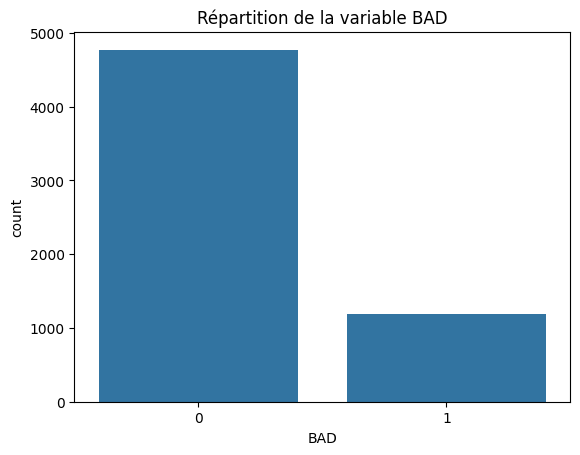

In [6]:
sns.countplot(x='BAD', data=hmeq)
plt.title('Répartition de la variable BAD')
plt.show()

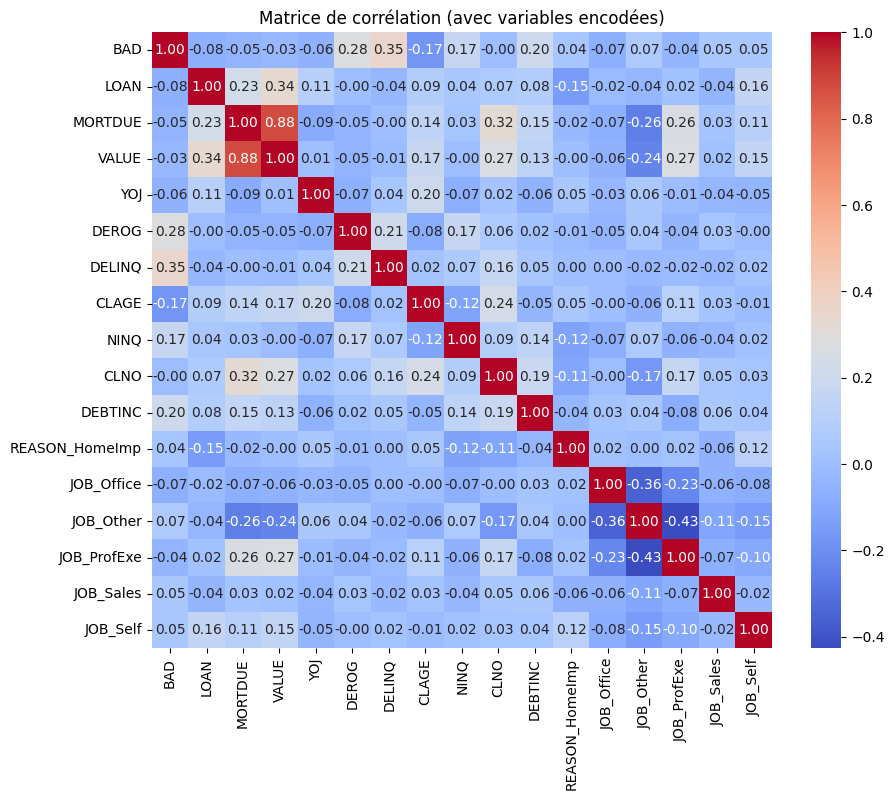

In [26]:
hmeq_encoded = pd.get_dummies(hmeq, drop_first=True) # Le drop_first permet d'éviter la multicolinéarité en supprimant une des colonnes de chaque variable encodée
corr_matrix_encoded = hmeq_encoded.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_encoded, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation (avec variables encodées)')
plt.show()

In [34]:
hmeq_encoded.corr()['BAD'].sort_values(ascending=False)

BAD               1.000000
DELINQ            0.354107
DEROG             0.276081
DEBTINC           0.199835
NINQ              0.174980
JOB_Other         0.066489
JOB_Sales         0.050934
JOB_Self          0.046245
REASON_HomeImp    0.037517
CLNO             -0.004157
VALUE            -0.029954
JOB_ProfExe      -0.043561
MORTDUE          -0.048219
YOJ              -0.060238
JOB_Office       -0.073613
LOAN             -0.075099
CLAGE            -0.170499
Name: BAD, dtype: float64

In [31]:
# hmeq_encoded_2 = pd.get_dummies(hmeq, columns=['REASON', 'JOB'])
# # hmeq_encoded_2.head()
# # Ici on a une colonne en plus 
# correlation = hmeq_encoded_2['REASON_HomeImp'].corr(hmeq_encoded_2['REASON_DebtCon'])
# print(f"Corrélation entre colonne1 et colonne2 : {correlation}")
# corr_homeimp = hmeq_encoded_2['REASON_HomeImp'].corr(hmeq_encoded_2['BAD'])
# corr_debtcon = hmeq_encoded_2['REASON_DebtCon'].corr(hmeq_encoded_2['BAD'])

# print(f"Corrélation entre REASON_HomeImp et BAD : {corr_homeimp}")
# print(f"Corrélation entre REASON_DebtCon et BAD : {corr_debtcon}")


Corrélation de la variable cible "BAD" :

DELINQ (0.35) a la corrélation positive la plus forte avec BAD, ce qui indique que plus une personne a des défauts de paiement passés, plus elle a de chances de faire défaut à nouveau.

DEROG (0.28) est également positivement corrélé avec BAD, signifiant qu'un historique de incidents de crédit négatifs augmente la probabilité de défaut.

DEBTINC (0.20) montre aussi une corrélation modérée, soulignant qu'un ratio d'endettement élevé est associé à un risque accru de défaut.

Corrélations entre les variables indépendantes :

MORTDUE et VALUE (0.88) présentent une corrélation très forte, ce qui pourrait engendrer des problèmes de multicolinéarité. Ce lien reflète la relation attendue entre la valeur de la maison et le montant de l'hypothèque.

D'autres corrélations notables incluent CLNO avec MORTDUE (0.32) et VALUE (0.32), indiquant que ces variables sont également liées aux caractéristiques financières des emprunteurs.



Conclusion et recommandations :

1-DELINQ, DEROG, et DEBTINC présentent des corrélations significatives avec BAD. Il faudrait donc les conserver pour la modélisation, car elles fournissent des informations cruciales sur le comportement financier des emprunteurs.

MAIS DEBTINC a +20% de valeures manquantes. Il vaut mieu suppr ou imputer ???

2-Forte corrélation entre MORTDUE et VALUE (0.88), il vaut mieu conserver uniquement une de ces variables ou de créer une nouvelle variable (comme un ratio prêt/valeur) afin de réduire la multicolinéarité!(Comme tu disais Lina de créer une nouvelle varaible)
De meme pour les autres varaibles qui sont corrélé modérément???

3-Les variables liées à l'emploi et à la raison du prêt, sont faiblement corrélé avec BAD, pourraient être exclues du modèle (ou utilisées pour des analyses secondaires)

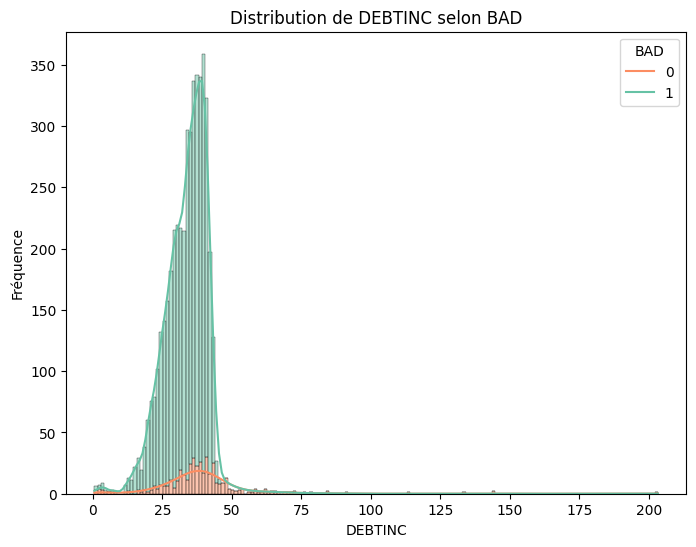

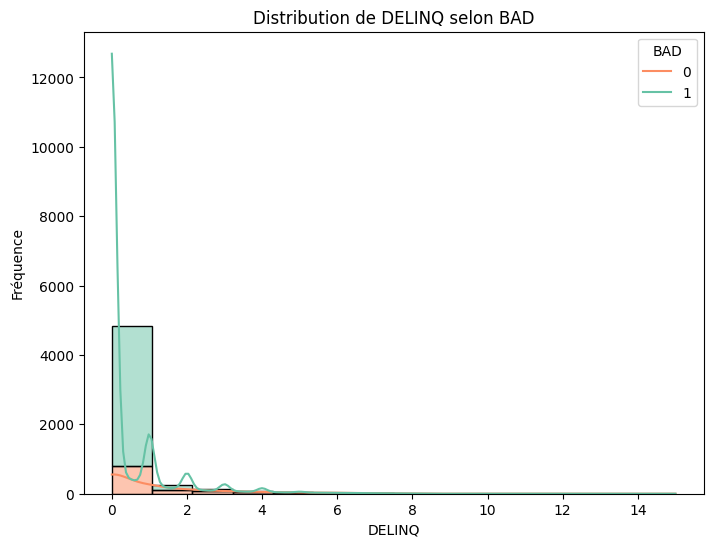

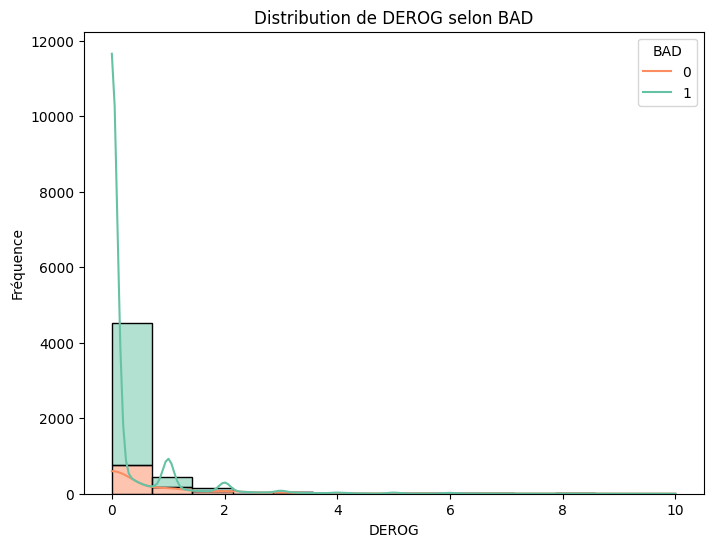

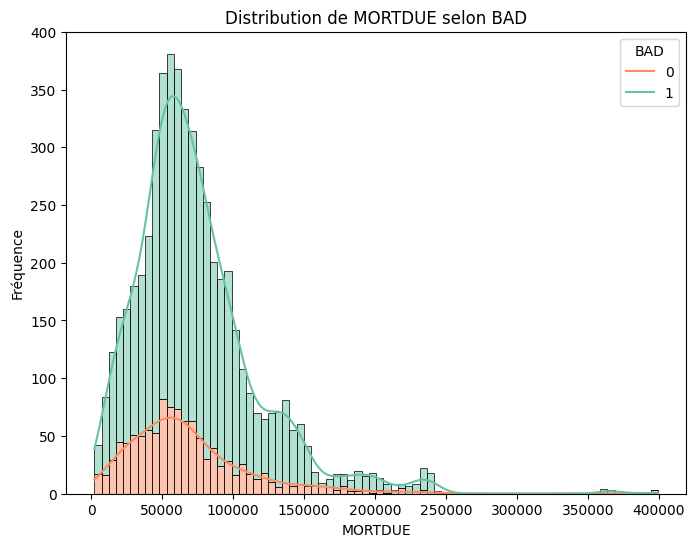

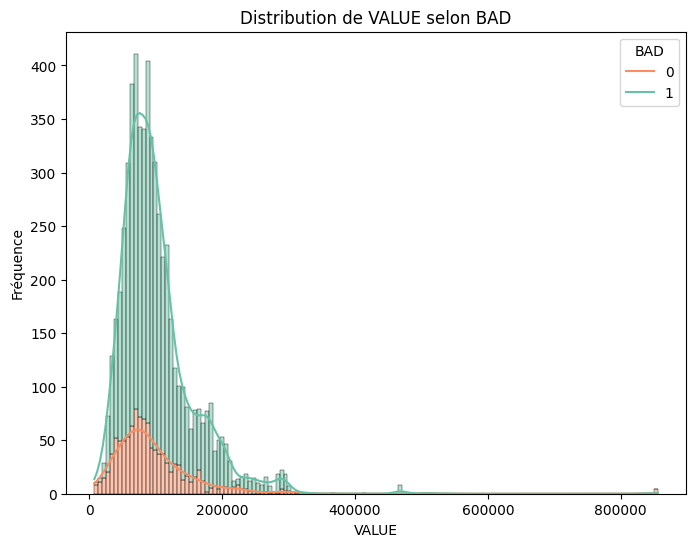

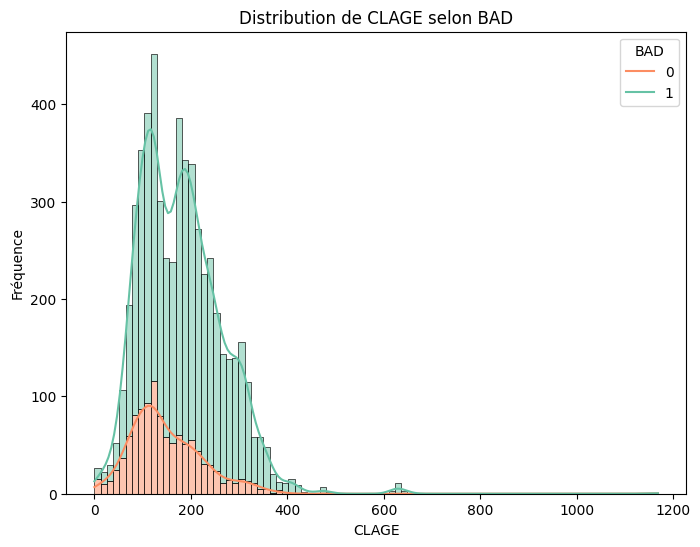

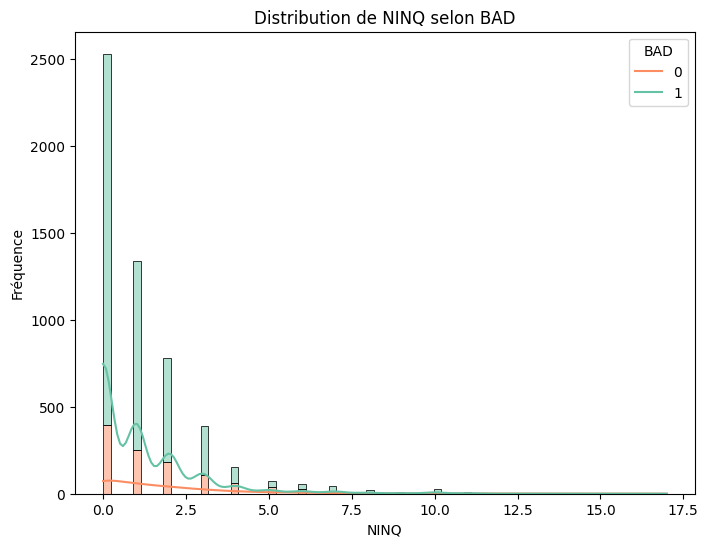

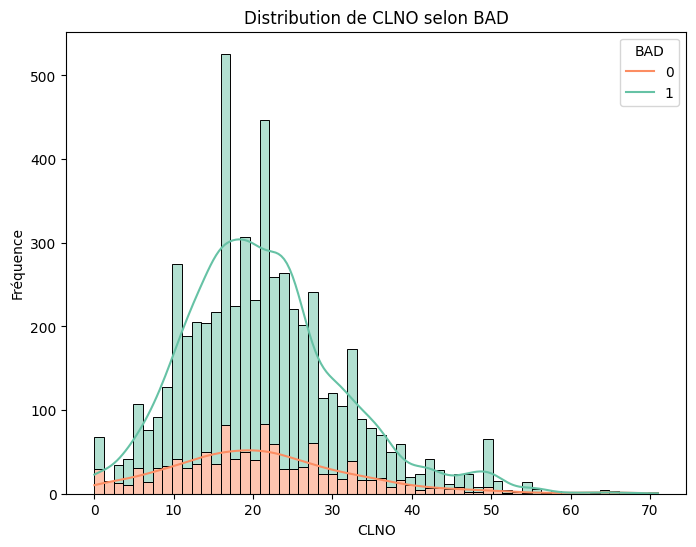

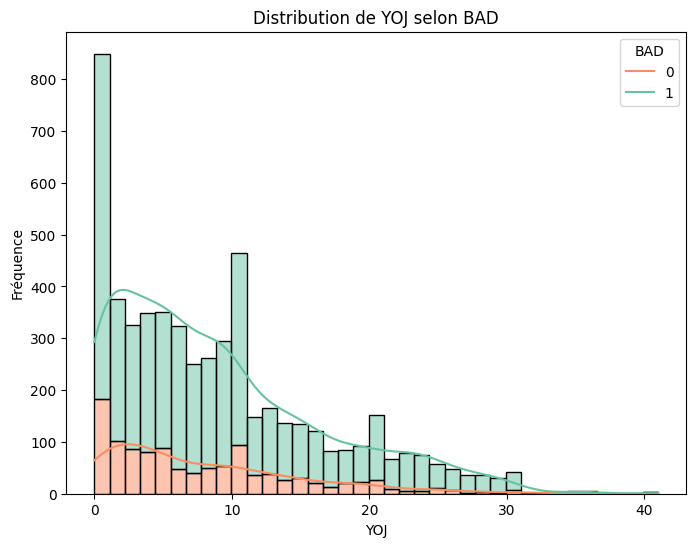

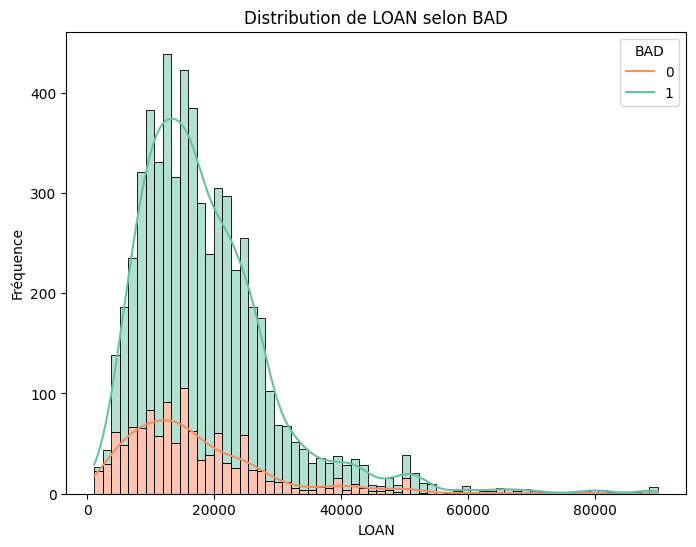

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

variables_a_analyser = ['DEBTINC', 'DELINQ', 'DEROG', 'MORTDUE', 'VALUE', 'CLAGE', 'NINQ', 'CLNO', 'YOJ', 'LOAN']

for var in variables_a_analyser:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=hmeq, x=var, kde=True, hue='BAD', multiple="stack", palette="Set2")
    plt.title(f'Distribution de {var} selon BAD')
    plt.xlabel(var)
    plt.ylabel('Fréquence')
    plt.legend(title="BAD", labels=['0', '1'])
    plt.show()

DELINQ, DEROG, CLAGE, NINQ, et YOJ sont les variables les plus discriminantes pour prédire le risque de défaut, car elles montrent une différence nette entre les emprunteurs défaillants et non-défaillants.

MORTDUE et VALUE montrent des différences modérées entre les deux groupes, indiquant que la situation hypothécaire et la valeur du bien immobilier sont également liées au risque de défaut.

DEBTINC et LOAN sont moins discriminants visuellement, mais la corrélation de DEBTINC avec BAD (0.20) suggère qu'il peut avoir une importance modérée dans la modélisation du risque de défaut.

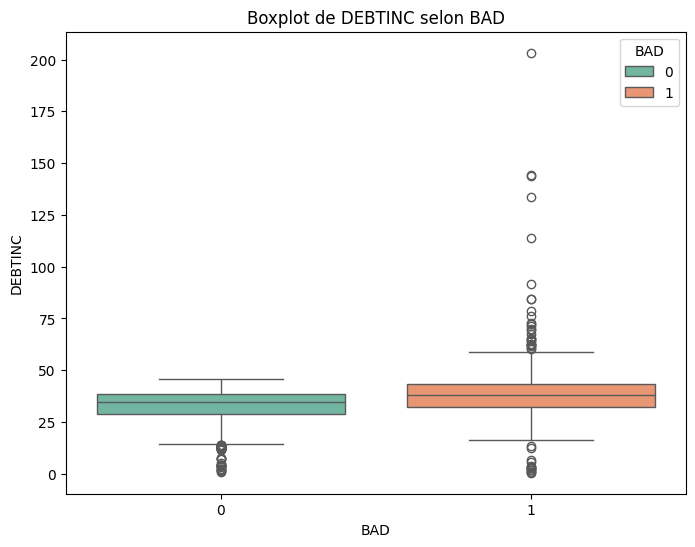

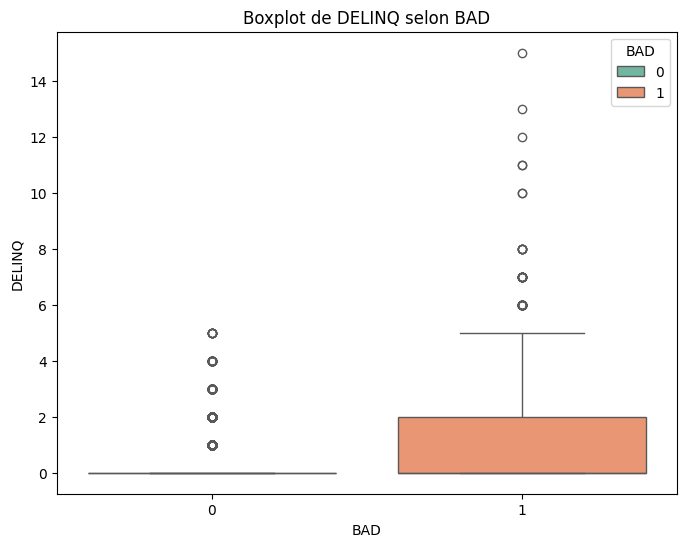

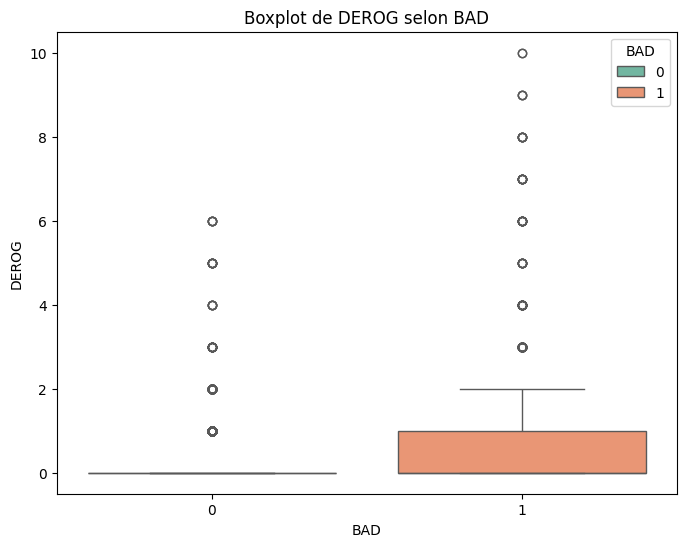

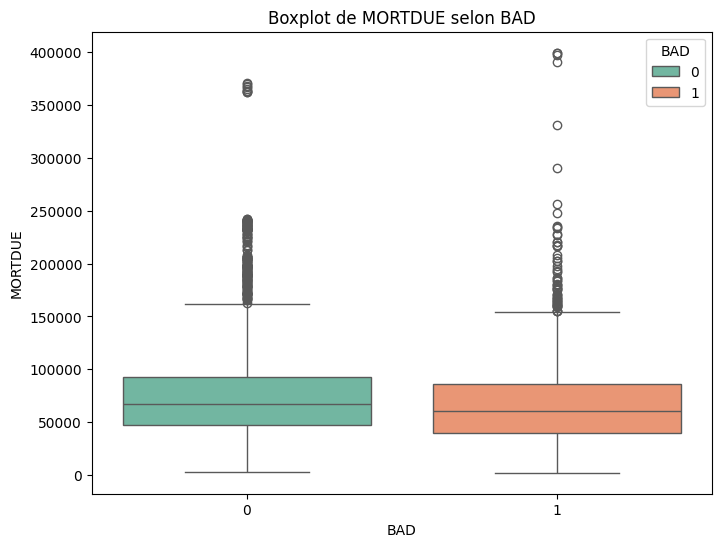

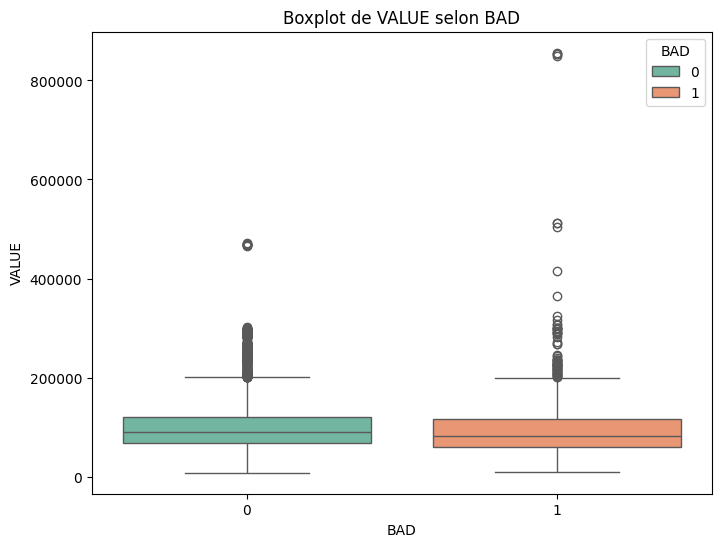

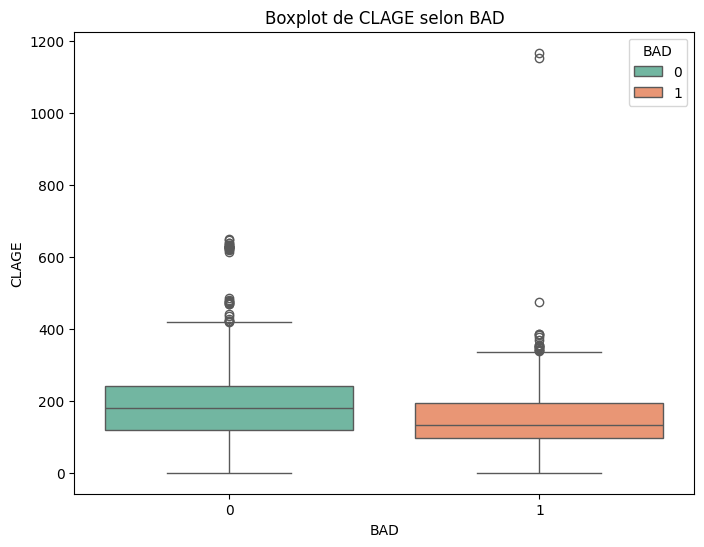

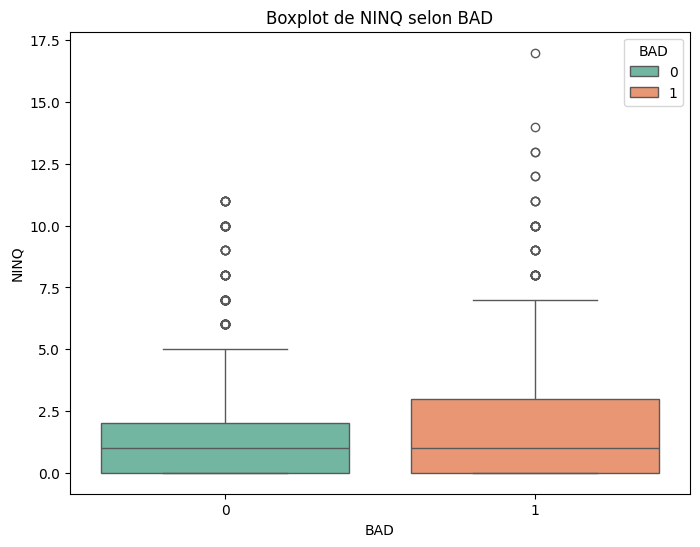

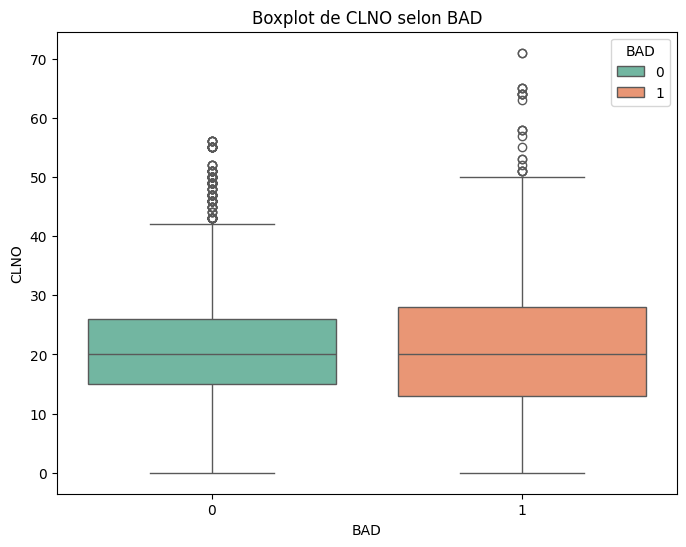

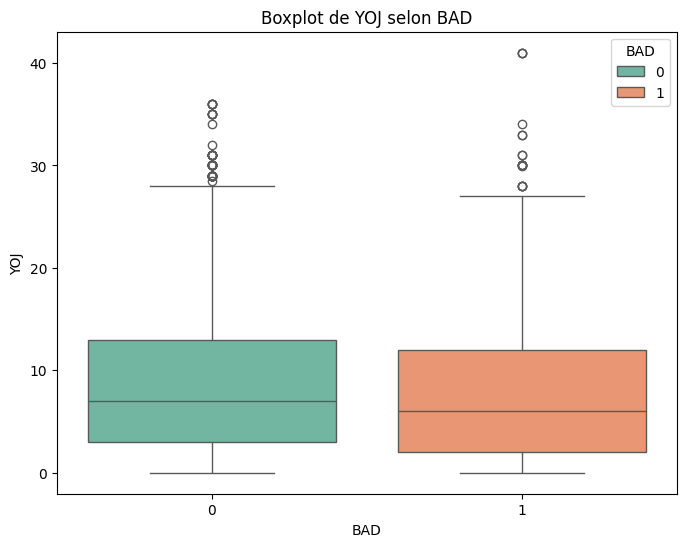

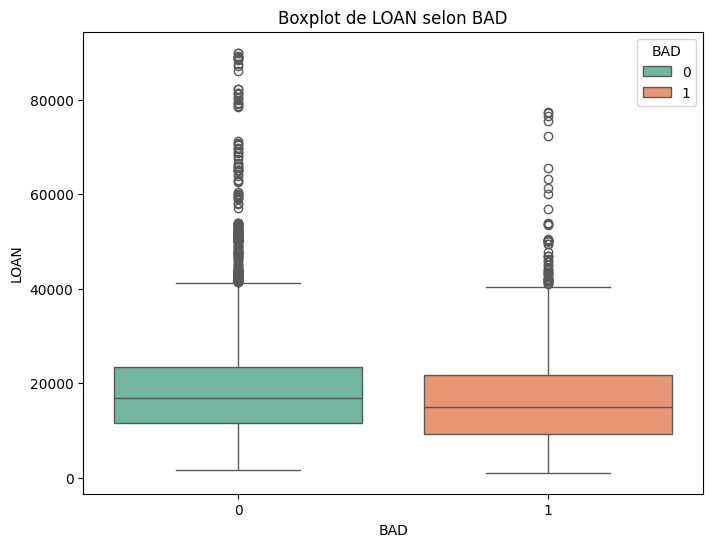

In [36]:
for var in variables_a_analyser:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='BAD', y=var, data=hmeq, hue='BAD', palette="Set2", dodge=False)
    plt.title(f'Boxplot de {var} selon BAD')
    plt.xlabel('BAD')
    plt.ylabel(var)
    plt.legend(title='BAD', loc='upper right')
    plt.show()



Variables fortement discriminantes : DELINQ, DEROG, CLAGE sont les plus discriminantes et devraient être privilégiées dans les analyses prédictives.

Variables modérément discriminantes : DEBTINC, MORTDUE, NINQ, CLNO peuvent apporter des informations supplémentaires, mais leur impact est moins prononcé.

Variables faiblement discriminantes : VALUE, YOJ, LOAN semblent avoir un impact plus faible et pourraient être moins prioritaires dans la modélisation.